In [1]:
from IPython.display import Image, display, HTML
from mira.modeling import Model
from mira.modeling.viz import GraphicalModel
from mira.metamodel import Concept
from pathlib import Path
import json
from pydantic.json import pydantic_encoder

desktop = Path.home().joinpath("Desktop")

def to_desktop(m, name):
    desktop.joinpath(name).write_text(m.json(indent=2))

This is the model given as a DOI at the top of Scenario 1


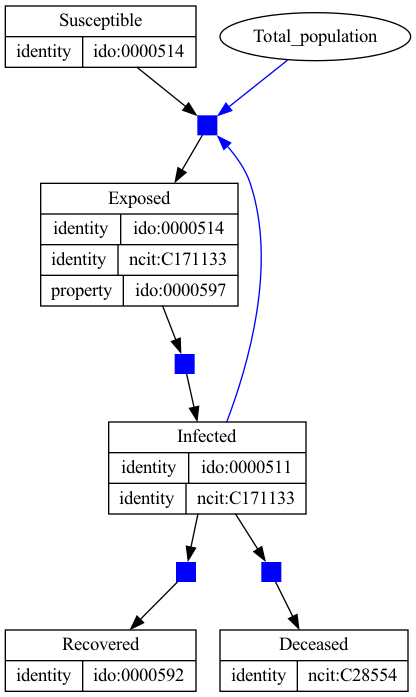

In [2]:
from mira.sources.biomodels import get_template_model

model_1 = get_template_model('BIOMD0000000974')

to_desktop(model_1, "BIOMD0000000974.mmt.json")

GraphicalModel.for_jupyter(model_1, width="30%")

The second model requested is the first one that's been stratified by vaccination status

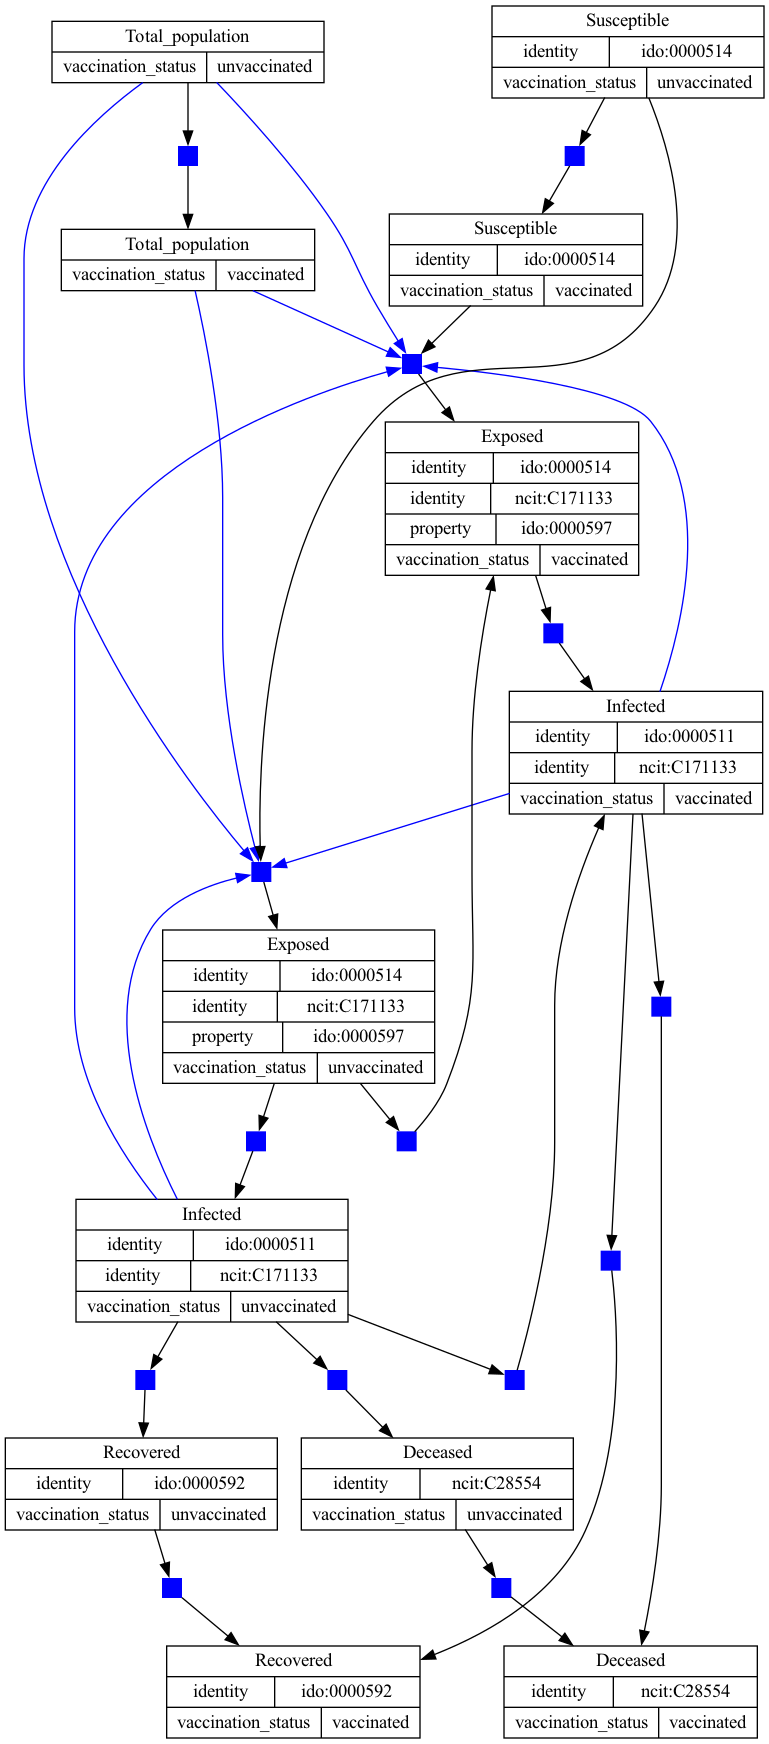

In [13]:
from mira.metamodel.ops import stratify

model_2 = stratify(
    model_1, 
    key="vaccination_status", 
    strata={"vaccinated", "unvaccinated"},
    structure=[("unvaccinated", "vaccinated")],
    directed=True,
)

GraphicalModel.for_jupyter(model_2, width="50%")

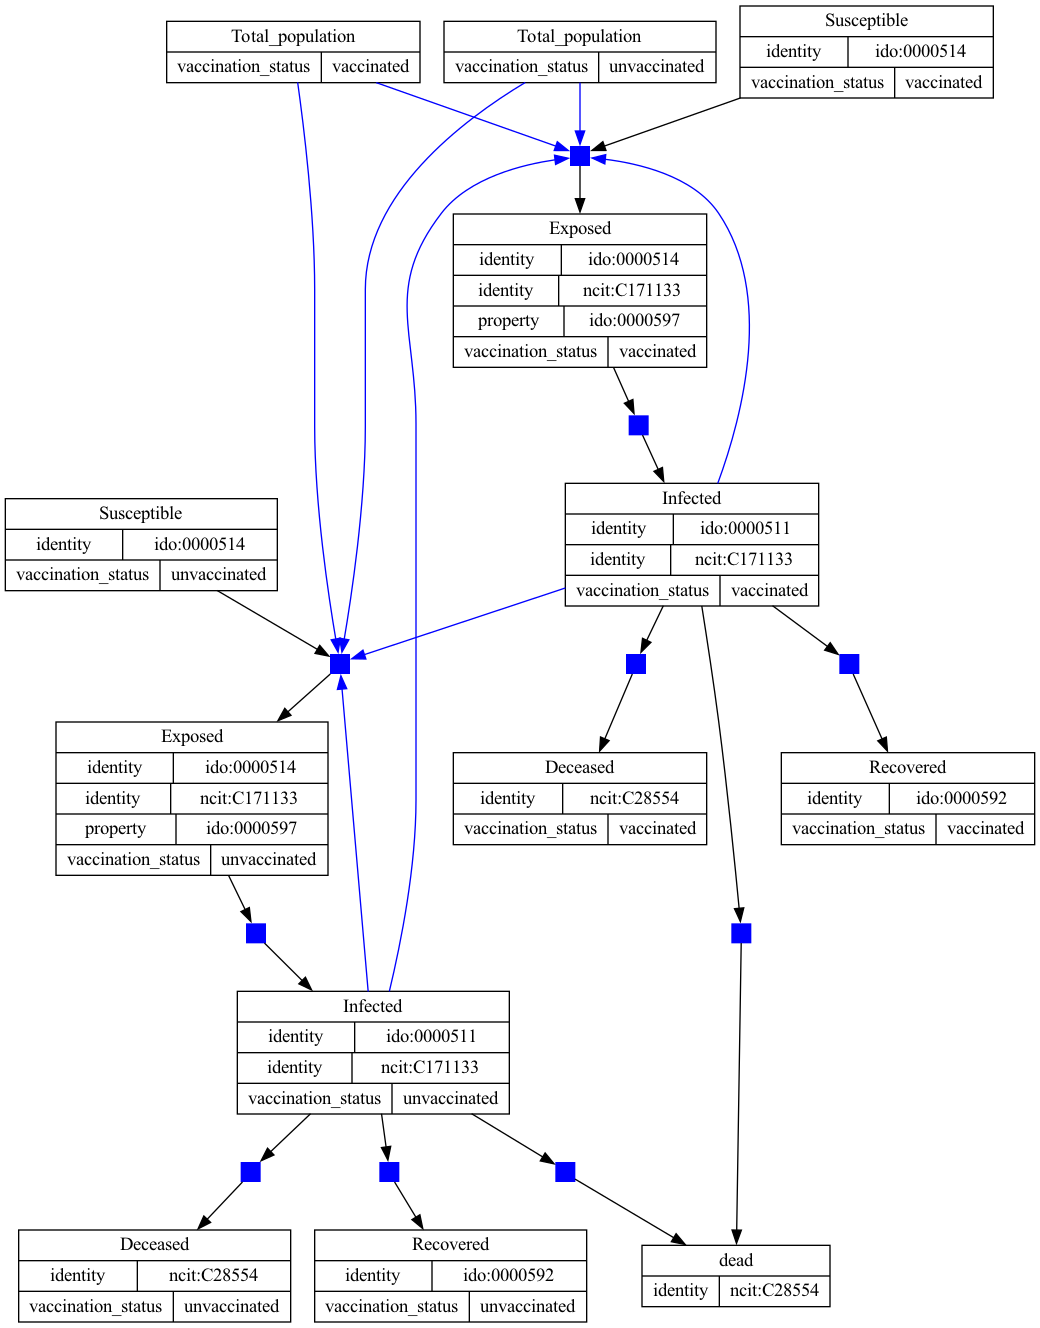

In [4]:
dead = Concept(name="dead", identifiers={"ncit": "C28554"})

model_3 = model_2
for infected in model_2.get_concepts_by_name("Infected"):
    model_3 = model_3.add_transition(infected, dead)
    
GraphicalModel.for_jupyter(model_3, width="50%")

This is the model mentioned in Scenario 1 task 3 for model comparison, subheading A-i

In [5]:
from mira.examples.jin2022 import seird_stratified

to_desktop(seird_stratified, "jin2022_seird_stratified.mmt.json")

The third model is the CHIME SVIIvR (which adds vaccination to the original CHIME model)

In [6]:
from mira.examples.chime import sviivr

to_desktop(sviivr, "chime_sviivr.mmt.json")

# Comparison

In [7]:
from mira.metamodel.templates import TemplateModelDelta
from IPython.display import Image
# from mira.metamodel.templates import get_dkg_refinement_closure
# refinement_fun = get_dkg_refinement_closure().is_ontological_child

from mira.dkg.web_client import is_ontological_child_web as refinement_fun

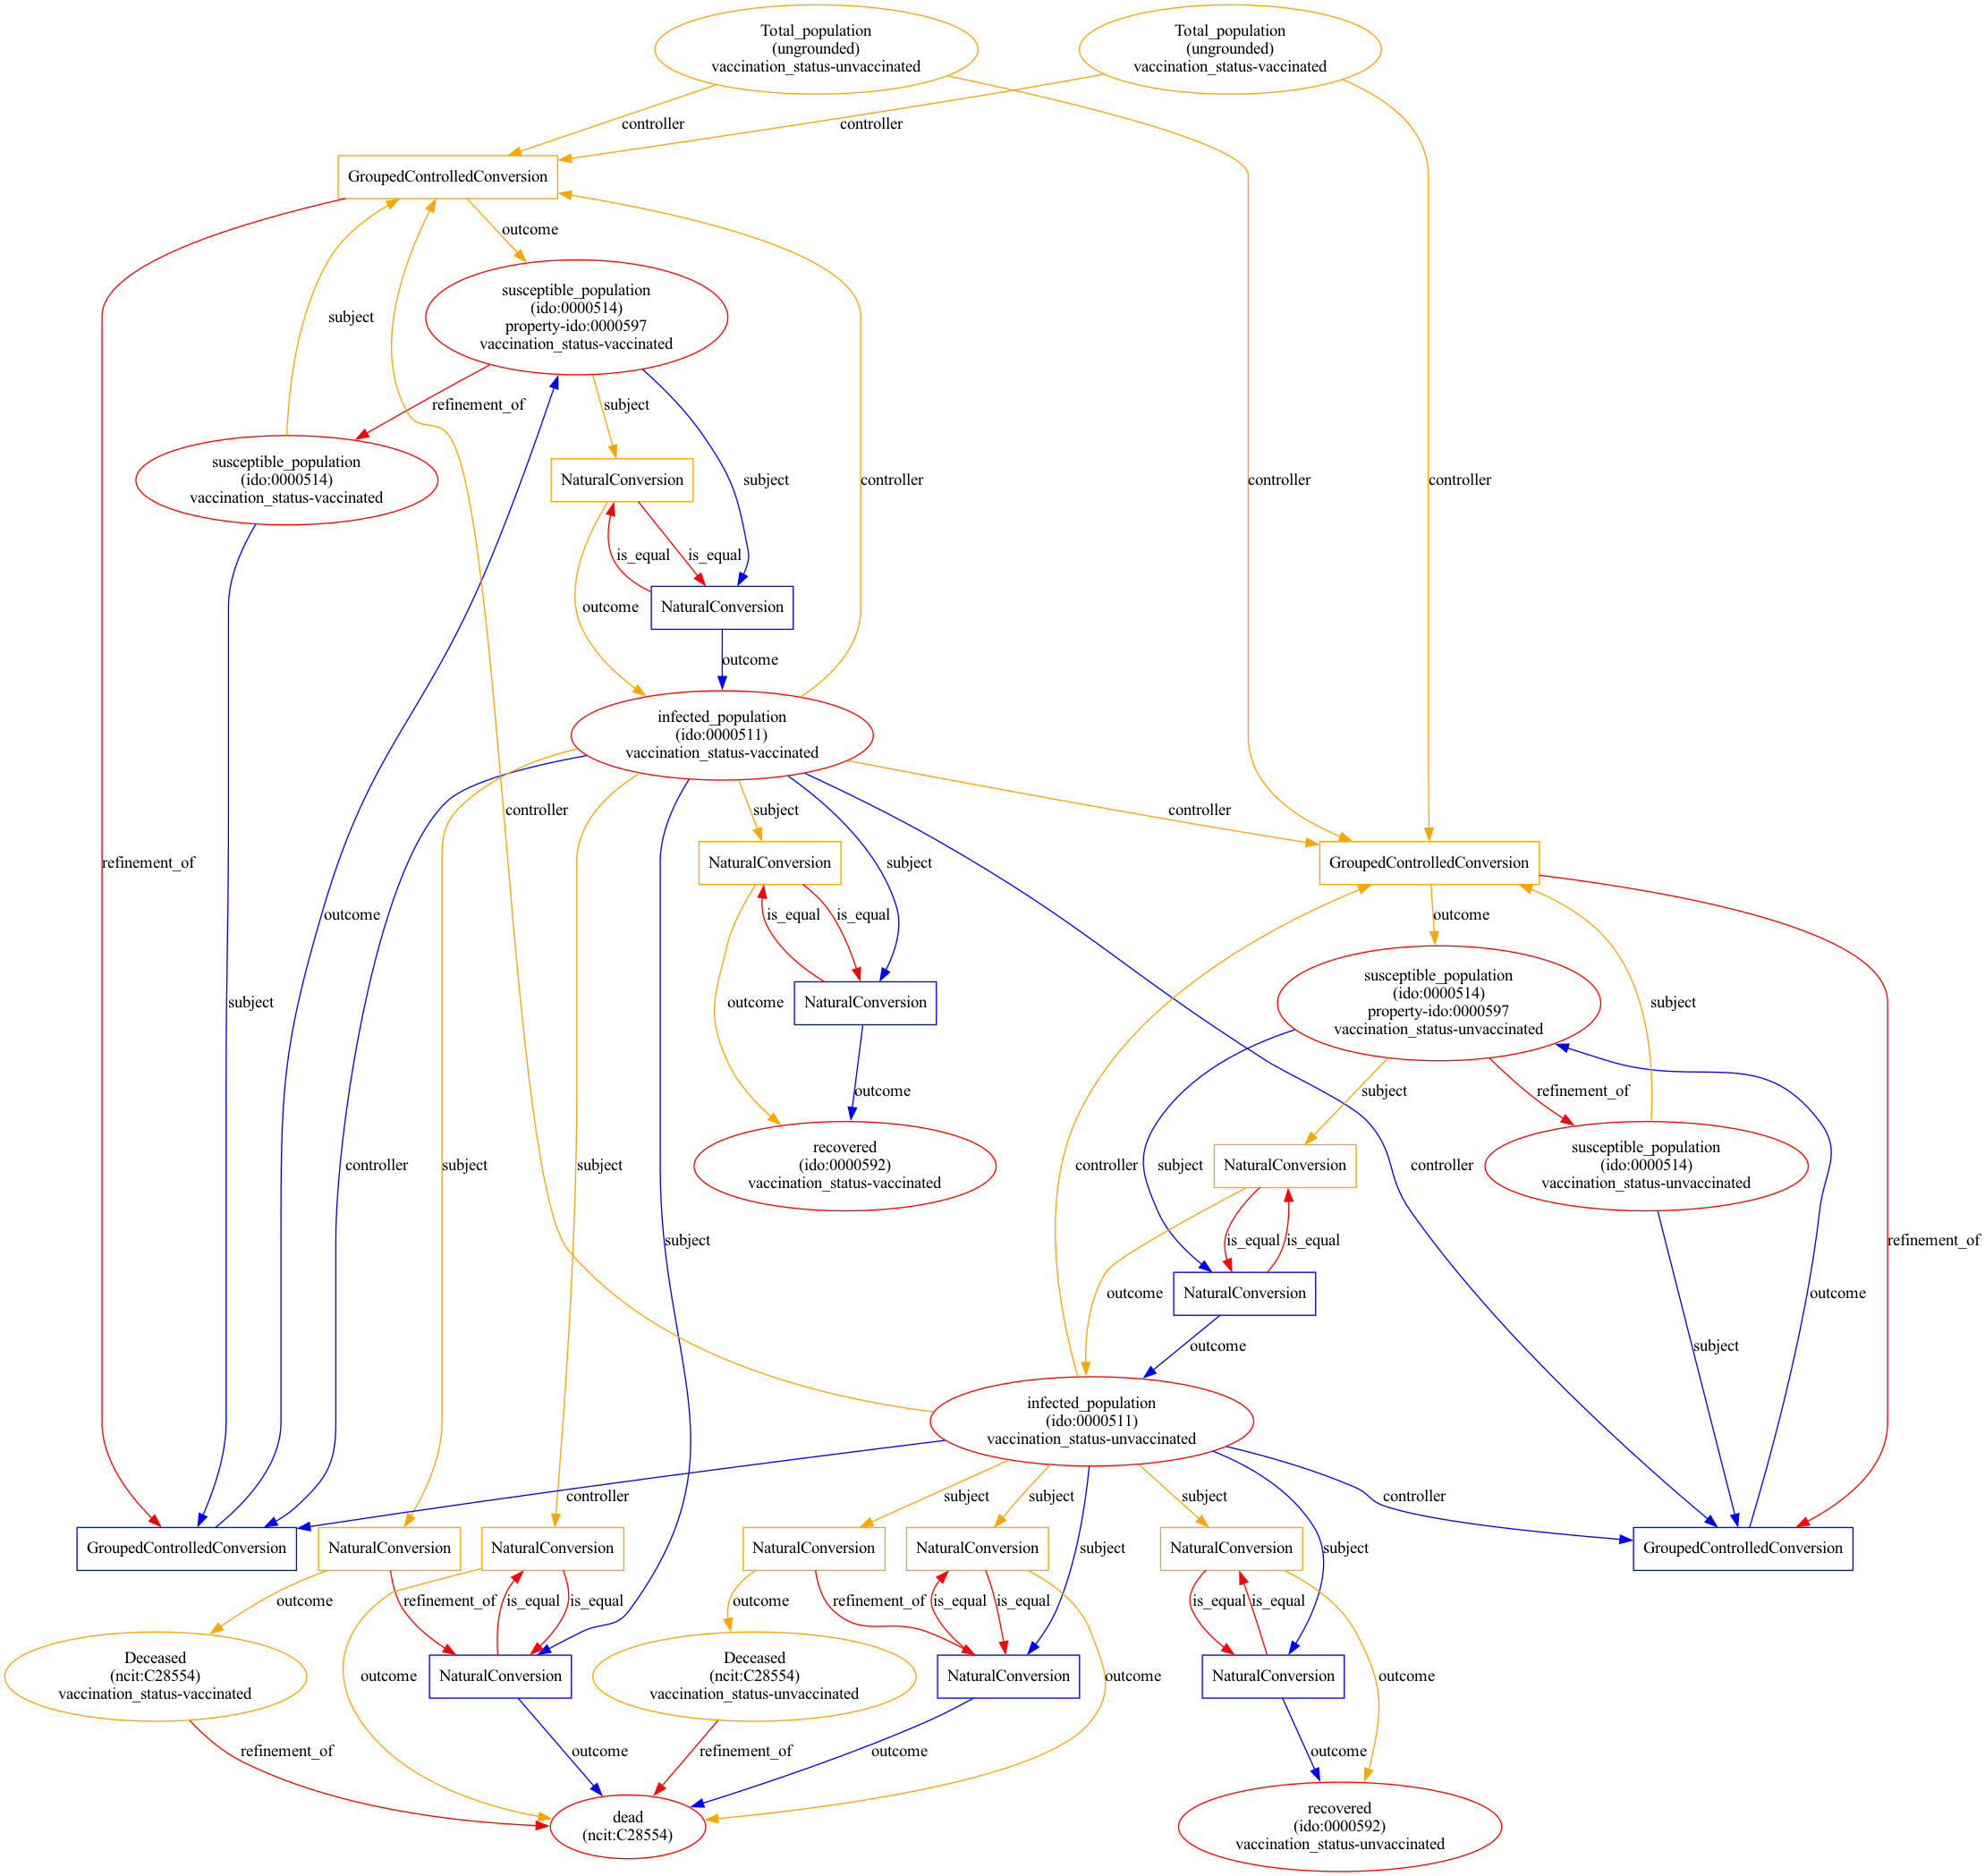

In [11]:
td = TemplateModelDelta(model_3, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

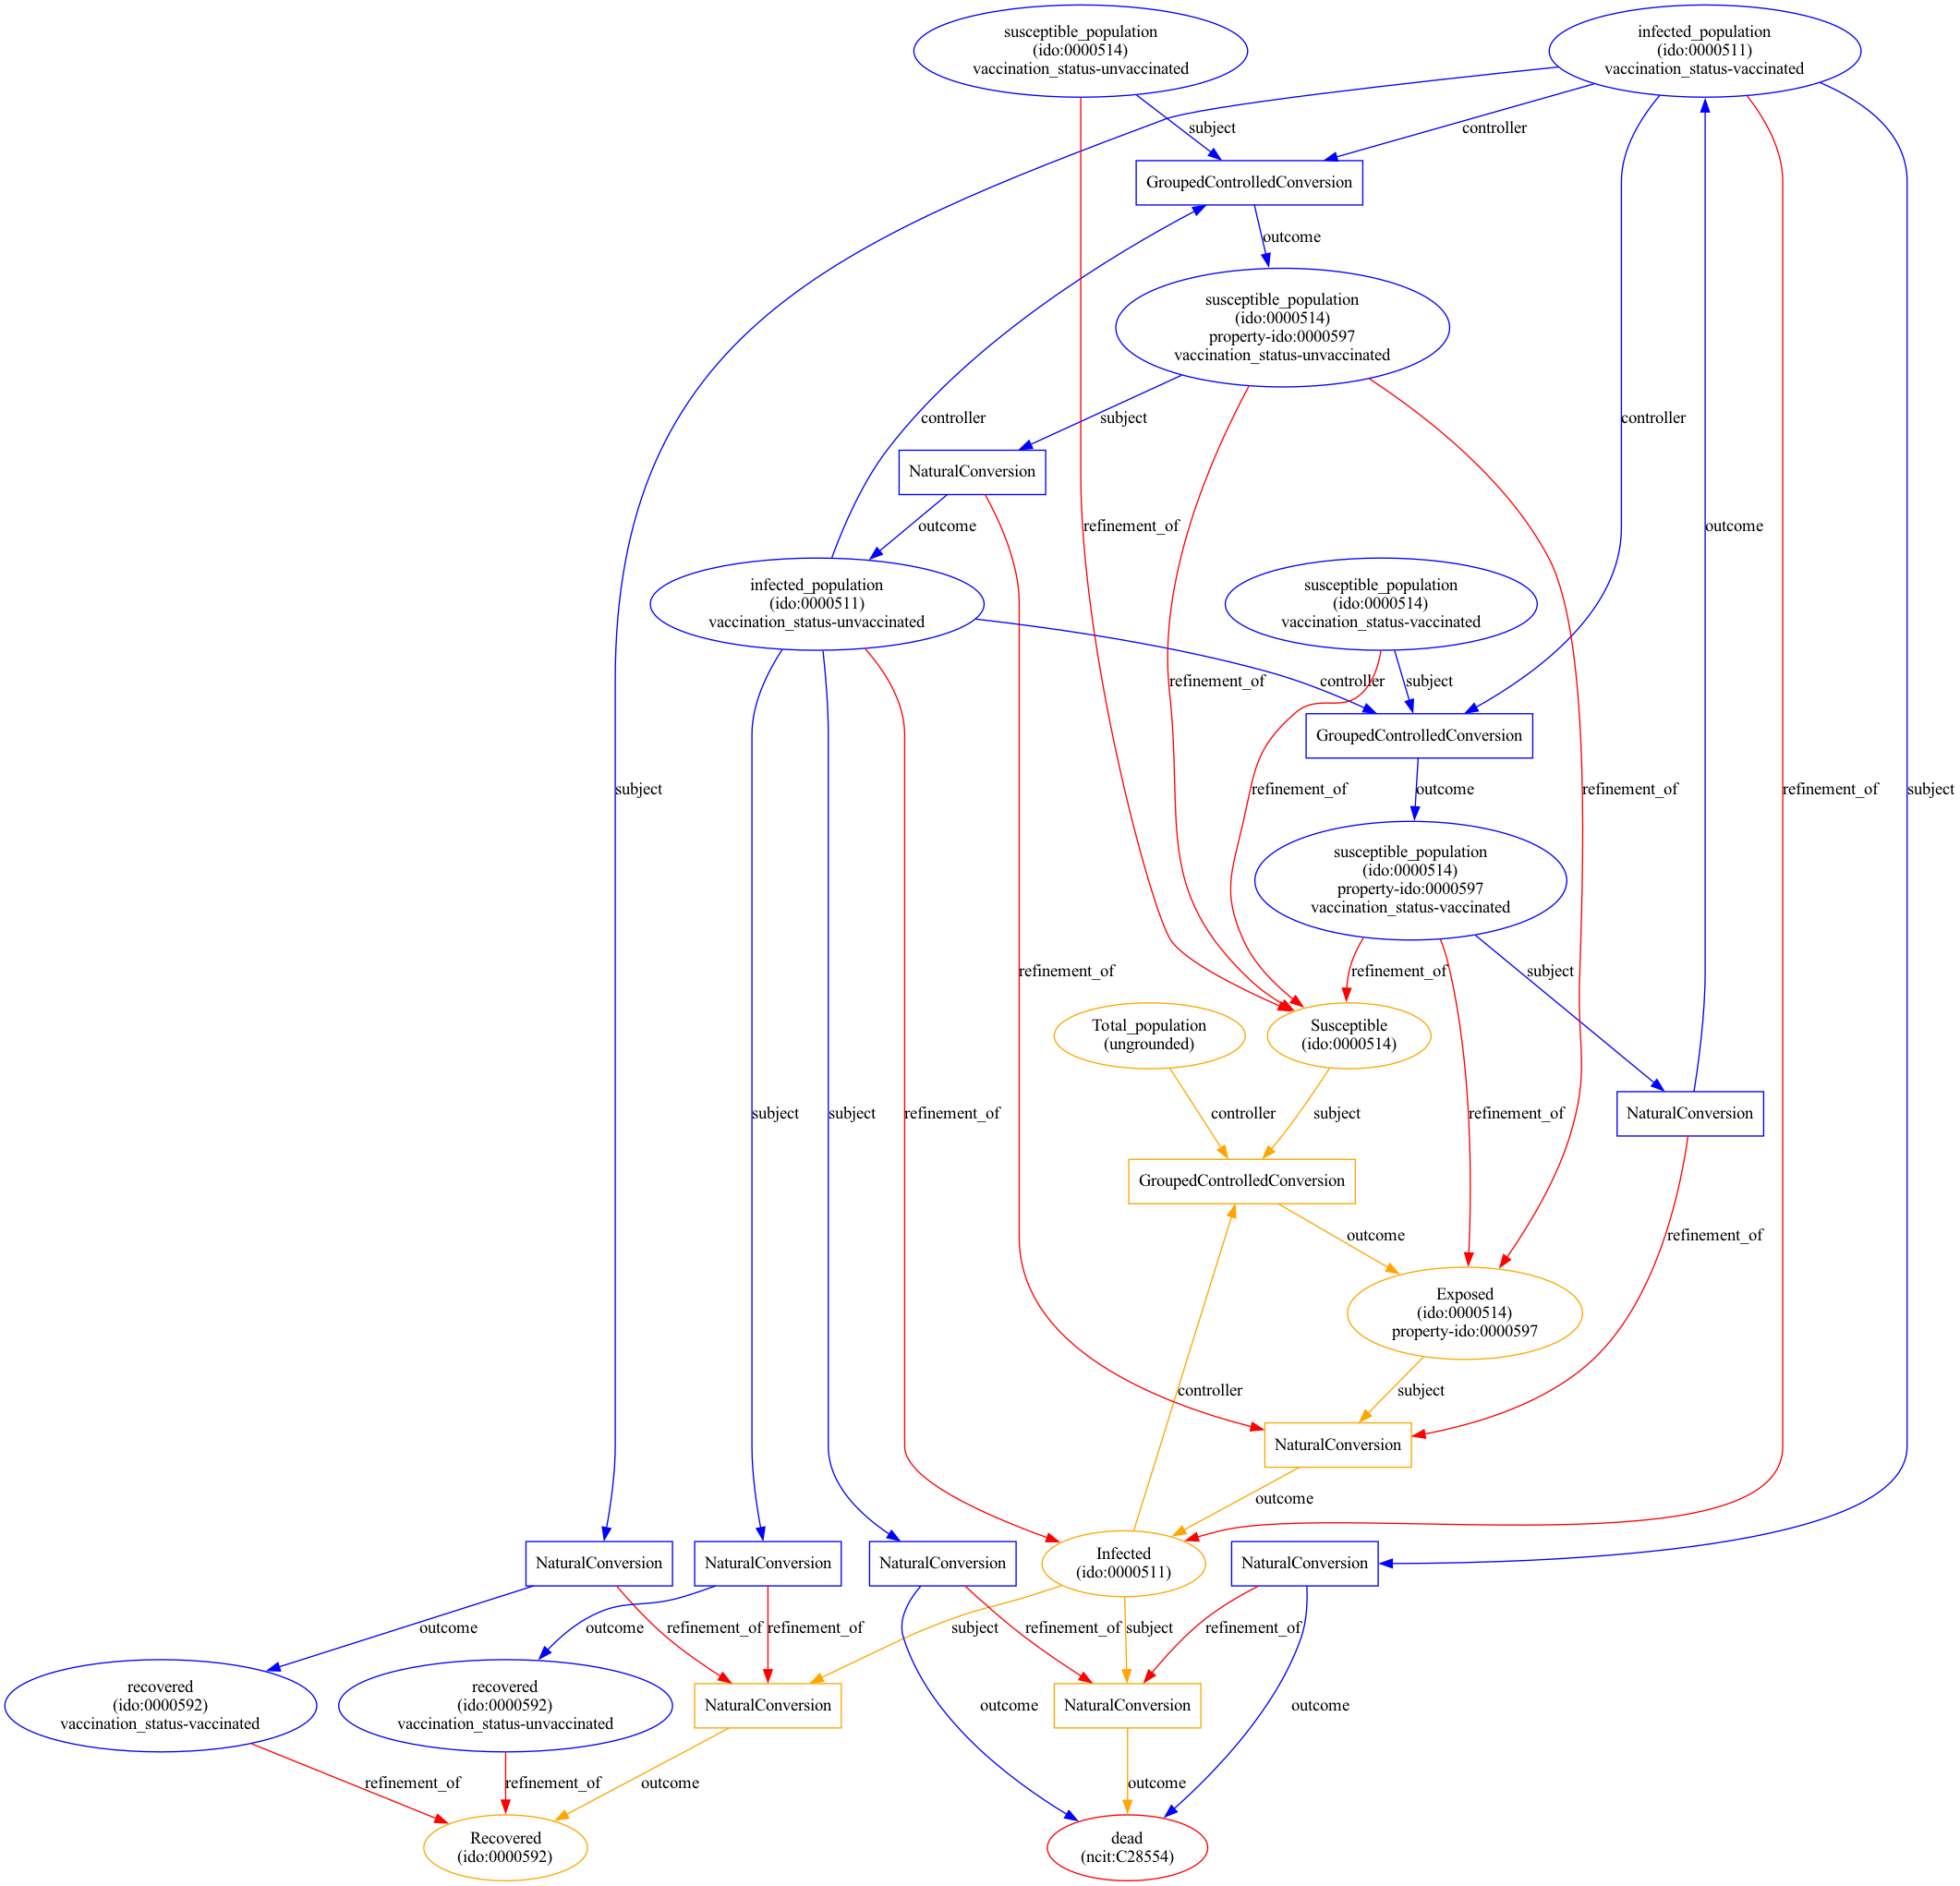

In [9]:
td = TemplateModelDelta(model_1, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

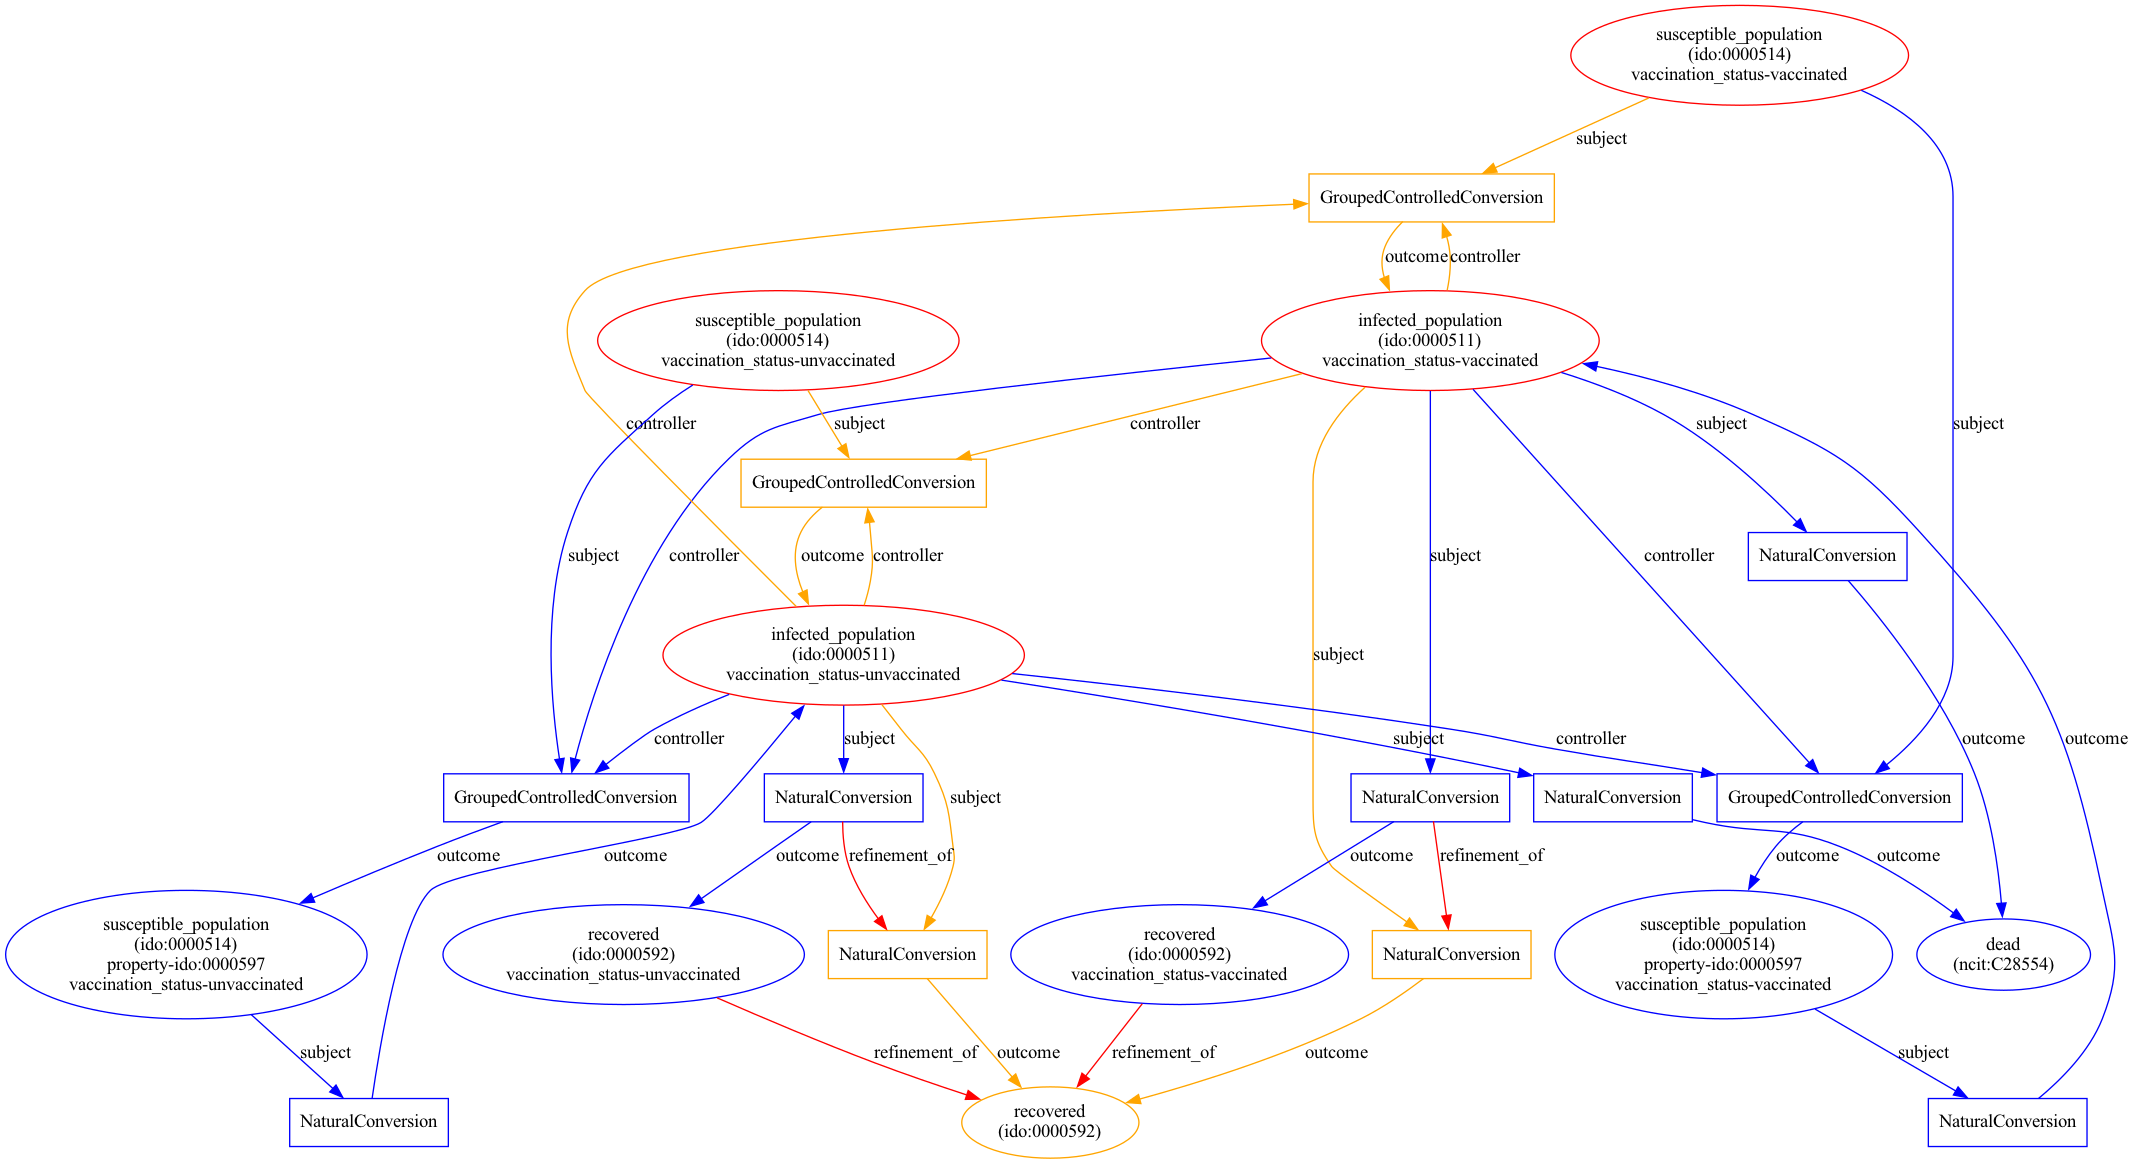

In [10]:
td = TemplateModelDelta(sviivr, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')